Set-up

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from statannotations.Annotator import Annotator

In [3]:
os.getcwd()
#working directory should be /Code/CodeFigure5

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure5'

Plotting Phenotype Penetrance in 1 vs 6 Weeks for ;10930;>;Atg8a-mCherry-GFP;

Note: You will need to run the StatsPhenotypePenetranceAtg8a.Rmd file first, or annotate out the stats code

In [4]:
csv_path = "../../Data/DataFigure5/Atg8amChGfpPhenotype_n.csv"
df = pd.read_csv(csv_path)

In [5]:
df['PercentPhenotype'] = df['Phenotype'] * 100

df['Group'] = df['Weeks'].astype(str) + 'wk-' + df['Genotype']
df['Group'] = df['Group'].replace({
    '1wk-Control': '1wk Ctrl',
    '1wk-Exp': '1wk Exp',
    '6wk-Control': '6wk Ctrl',
    '6wk-Exp': '6wk Exp'
})

order = ['1wk Ctrl', '1wk Exp', '6wk Ctrl', '6wk Exp']
df['Group'] = pd.Categorical(df['Group'], categories=order, ordered=True)

df.head(20)

,Weeks,Genotype,Phenotype,n,N,PercentPhenotype,Group
0,1,Control,0.0769,39,1,7.69,1wk Ctrl
1,1,Exp,0.1707,123,1,17.07,1wk Exp
2,1,Control,0.0682,44,2,6.82,1wk Ctrl
3,1,Exp,0.2069,58,2,20.69,1wk Exp
4,1,Control,0.1563,32,3,15.63,1wk Ctrl
5,1,Exp,0.1296,54,3,12.96,1wk Exp
6,6,Control,0.5161,31,1,51.61,6wk Ctrl
7,6,Exp,0.0682,44,1,6.82,6wk Exp
8,6,Control,0.6000,20,2,60.00,6wk Ctrl
9,6,Exp,0.2022,89,2,20.22,6wk Exp


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_49956/140273577.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_49956/140273577.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_max = df.groupby("Group")["PercentPhenotype"].max()
/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_49956/140273577.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


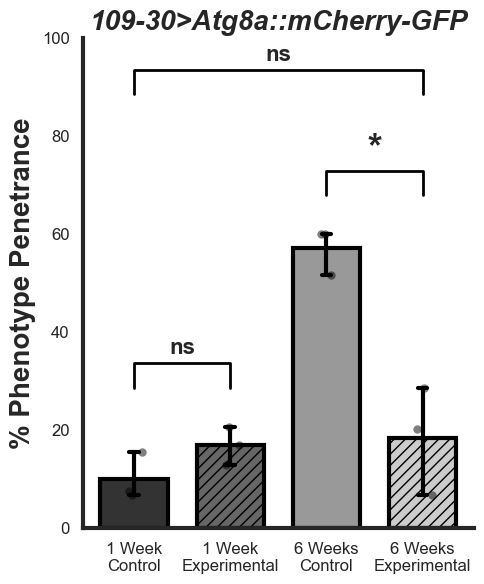

In [13]:
stats_path = "../../Results/ResultsFigure5/StatsPhenotypePenetranceAtg8attest.csv"
stats = pd.read_csv(stats_path)
comparison_to_stars = dict(zip(stats["comparison"], stats["stars"]))

# Bar plot order
order = ['1wk Ctrl', '1wk Exp', '6wk Ctrl', '6wk Exp']

# Figure setup
fig, ax = plt.subplots(figsize=(5, 6))
sns.set(style="white")

# Barplot
barplot = sns.barplot(
    data=df,
    x='Group',
    y='PercentPhenotype',
    order=order,
    palette='gray',
    capsize=0.1,
    err_kws={'color': 'black', 'linewidth': 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

# Add hatching for experimental bars
exp_indices = [1, 3]  # 1wk Exp and 6wk Exp
for i, patch in enumerate(ax.patches):
    if i in exp_indices:
        patch.set_hatch('///') 
        patch.set_edgecolor('black')
        patch.set_linewidth(3)

# Stripplot
sns.stripplot(
    data=df,
    x="Group",
    y="PercentPhenotype",
    order=order,
    ax=ax,
    color="black",
    alpha=0.5,
    size=6,
    jitter=True
)

# Compute max y per group for annotations
y_max = df.groupby("Group")["PercentPhenotype"].max()

# Function to add significance bracket
def add_stat_bracket(ax, group1, group2, y_max_dict, star, offset=5, height=5):
    x1 = order.index(group1)
    x2 = order.index(group2)
    # y-position is above the taller bar
    y = max(y_max_dict[group1], y_max_dict[group2]) + offset
    # Draw bracket
    ax.plot([x1, x1, x2, x2], [y, y+height, y+height, y], lw=2, c='black')
    # Add star above bracket
    ax.text(
        (x1+x2)/2,
        y + height + 1,
        star,
        ha='center',
        va='bottom',
        fontsize=27 if star != "ns" else 16,
        fontweight="bold"
    )

# Define comparisons and their groups
comparison_groups = {
    "1 Week Control vs 1 Week Exp": ["1wk Ctrl", "1wk Exp"],
    "6 Week Control vs 6 Week Exp": ["6wk Ctrl", "6wk Exp"],
    "1 Week Control vs 6 Week Exp": ["1wk Ctrl", "6wk Exp"]
}

offsets = {
    "1 Week Control vs 1 Week Exp": 8,
    "6 Week Control vs 6 Week Exp": 8,
    "1 Week Control vs 6 Week Exp": 60
}

for comp, groups in comparison_groups.items():
    add_stat_bracket(ax, groups[0], groups[1], y_max, comparison_to_stars[comp], offset=offsets[comp], height=5)

# Plot formatting
ax.set_ylim(0, 100)
ax.set_ylabel("% Phenotype Penetrance", fontsize=20, weight="bold")
ax.tick_params(width=3, labelsize=12)
ax.set_xlabel("")
ax.set_xticklabels([
    "1 Week\nControl",
    "1 Week\nExperimental",
    "6 Weeks\nControl",
    "6 Weeks\nExperimental"
])
plt.title('109-30>Atg8a::mCherry-GFP', fontsize=20, weight='bold', style='italic')
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

results_directory = "../../Results/ResultsFigure5"
os.makedirs(results_directory, exist_ok=True)
filename = os.path.join(results_directory, "PhenotypePenetranceAtg8a.pdf")
plt.savefig(filename, format="pdf", bbox_inches="tight")
plt.show()
